In [11]:
import sys
import os
from os.path import abspath, join as path_join
import numpy as np
import ConfigSpace as CS
import json
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn


seaborn.set_style(style='whitegrid')


plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rc('font', size=15.0, family='serif')
plt.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [136]:
results_path = path_join(abspath("."), "..", "experiments/results")

datasets = ["mnist"]

results = dict()


r = dict()
for d in datasets:
    p = dict()
    validation_accuracy = []
    validation_loss = []
    runtime = []
    configs = []
    params = []
    pad = []
    rescale = []
    
    path = path_join(abspath("."), "..", "experiments/results")
    n_runs = len([name for name in os.listdir(path_join(path, "mnist"))])
    for i in range(1, n_runs):
        try:
            from os.path import abspath, join as path_join
            config_path = "%s/config_%d.json" % (d, i)
            filename = path_join(path, config_path)
            with open(filename, "r") as f:
                res = json.load(f)
        except FileNotFoundError:
            print(i, d)
            continue
        #print(res)
        runtime.append(res["runtime"])
        configs.append(res["config_id"])
        params.append(res["configs"])
        validation_accuracy.append(res["validation_accuracy"])
        pad.append((res['configs']['pad']))
        rescale.append(res['configs']['rescale'])

    
    p["validation_accuracy"] = np.array(validation_accuracy)
    #p["runtime"] = np.array(runtime)
    #p["params"] = params
    p["configs"] = configs
    p["pad"] = pad
    p['rescale'] = rescale
    results[d] = p




PDF plots of validation accuracy results on augmented MNIST image data

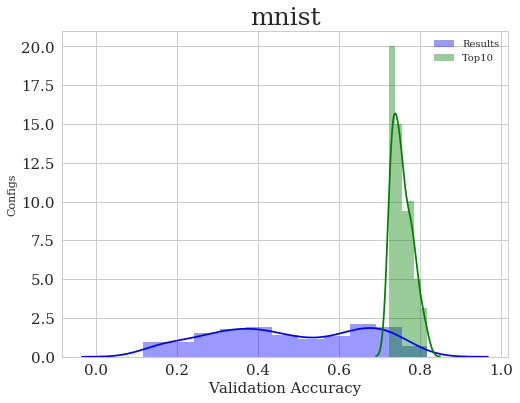

In [77]:
dataset = "mnist"
validation_accuracy = results[dataset]["validation_accuracy"]
top10 = np.sort(validation_accuracy)[-100:]
seaborn.distplot(validation_accuracy, label='Results', norm_hist=True,  color="blue")
seaborn.distplot(top10, label='Top10', norm_hist=True, color="green")
plt.legend()
plt.ylabel("Configs")
plt.xlabel("Validation Accuracy", fontsize=15)
plt.title(dataset, fontsize=25)

CDF Plots

/mhome/negassim/misgana_env/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


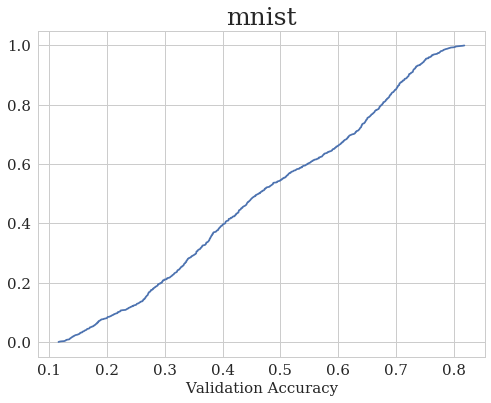

In [92]:
sorted_accuracy = np.sort(validation_accuracy)
yvals = np.arange(len(sorted_accuracy)) / float(len(sorted_accuracy))
plt.plot(sorted_accuracy, yvals)
plt.legend(loc=2, fontsize=10)
plt.xlabel("Validation Accuracy", fontsize=15)
plt.title(dataset, fontsize=25)


Plots with parameters, for example with padding and validation accuracy

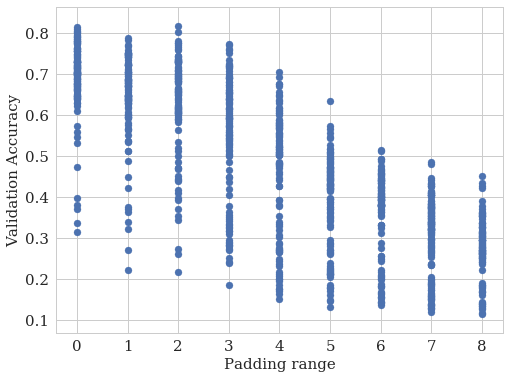

In [134]:
plt.scatter(x=pad, y=validation_accuracy)
plt.xlabel("Padding range", size=15)
plt.ylabel("Validation Accuracy", size=15)


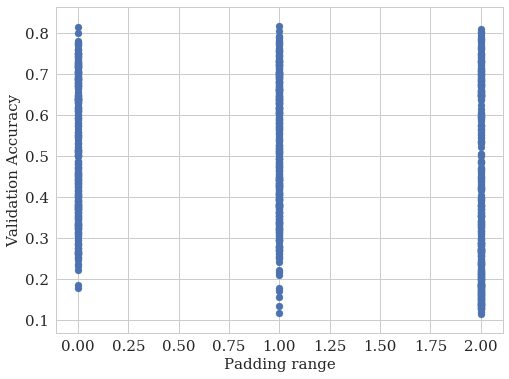

In [135]:
plt.scatter(x=rescale, y=validation_accuracy)
plt.xlabel("Rescale", size=15)
plt.ylabel("Validation Accuracy", size=15)

Make FANOVA Plots